In [4]:
import pandas as pd
import numpy as np

# Farklı encoding'lerle deneyelim
try:
    df = pd.read_csv('Sample - Superstore.csv', encoding='utf-8')
    print("UTF-8 ile başarılı!")
except:
    try:
        df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
        print("Latin-1 ile başarılı!")
    except:
        try:
            df = pd.read_csv('Sample - Superstore.csv', encoding='cp1252')
            print("CP1252 ile başarılı!")
        except:
            df = pd.read_csv('Sample - Superstore.csv', encoding='iso-8859-1')
            print("ISO-8859-1 ile başarılı!")

# Temel bilgiler
print("\n📊 VERİ SETİ BİLGİLERİ")
print("=" * 50)
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")
print(f"Veri boyutu: {df.shape}")

# İlk 5 satır
print("\n🔍 İLK 5 SATIR:")
df.head()

Latin-1 ile başarılı!

📊 VERİ SETİ BİLGİLERİ
Satır sayısı: 9994
Sütun sayısı: 21
Veri boyutu: (9994, 21)

🔍 İLK 5 SATIR:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:

print("SUTUN ISIMLERI:")
print("=" * 50)
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

print(f"\nToplam sutun sayisi: {len(df.columns)}")

SUTUN ISIMLERI:
 1. Row ID
 2. Order ID
 3. Order Date
 4. Ship Date
 5. Ship Mode
 6. Customer ID
 7. Customer Name
 8. Segment
 9. Country
10. City
11. State
12. Postal Code
13. Region
14. Product ID
15. Category
16. Sub-Category
17. Product Name
18. Sales
19. Quantity
20. Discount
21. Profit

Toplam sutun sayisi: 21


In [8]:

print("\nVERI TURLERI VE EKSIK DEGERLER:")
print("=" * 60)
info_df = pd.DataFrame({
    'Sutun': df.columns,
    'Veri_Turu': df.dtypes,
    'Eksik_Deger': df.isnull().sum(),
    'Eksik_Yuzde': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df.to_string(index=False))


VERI TURLERI VE EKSIK DEGERLER:
        Sutun Veri_Turu  Eksik_Deger  Eksik_Yuzde
       Row ID     int64            0          0.0
     Order ID    object            0          0.0
   Order Date    object            0          0.0
    Ship Date    object            0          0.0
    Ship Mode    object            0          0.0
  Customer ID    object            0          0.0
Customer Name    object            0          0.0
      Segment    object            0          0.0
      Country    object            0          0.0
         City    object            0          0.0
        State    object            0          0.0
  Postal Code     int64            0          0.0
       Region    object            0          0.0
   Product ID    object            0          0.0
     Category    object            0          0.0
 Sub-Category    object            0          0.0
 Product Name    object            0          0.0
        Sales   float64            0          0.0
     Quantity    

In [10]:

print("SAYISAL DEGISKENLERIN ISTATISTIKLERI:")
print("=" * 60)
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
print(df[numerical_cols].describe())

SAYISAL DEGISKENLERIN ISTATISTIKLERI:
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [12]:

print("\nKATEGORIK DEGISKENLER:")
print("=" * 60)
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'Category', 'Sub-Category']

for col in categorical_cols:
    print(f"\n{col} - Benzersiz deger sayisi: {df[col].nunique()}")
    print(df[col].value_counts().head())
    print("-" * 40)


KATEGORIK DEGISKENLER:

Ship Mode - Benzersiz deger sayisi: 4
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64
----------------------------------------

Segment - Benzersiz deger sayisi: 3
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
----------------------------------------

Country - Benzersiz deger sayisi: 1
Country
United States    9994
Name: count, dtype: int64
----------------------------------------

Category - Benzersiz deger sayisi: 3
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
----------------------------------------

Sub-Category - Benzersiz deger sayisi: 17
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Name: count, dtype: int64
----------------------------------------


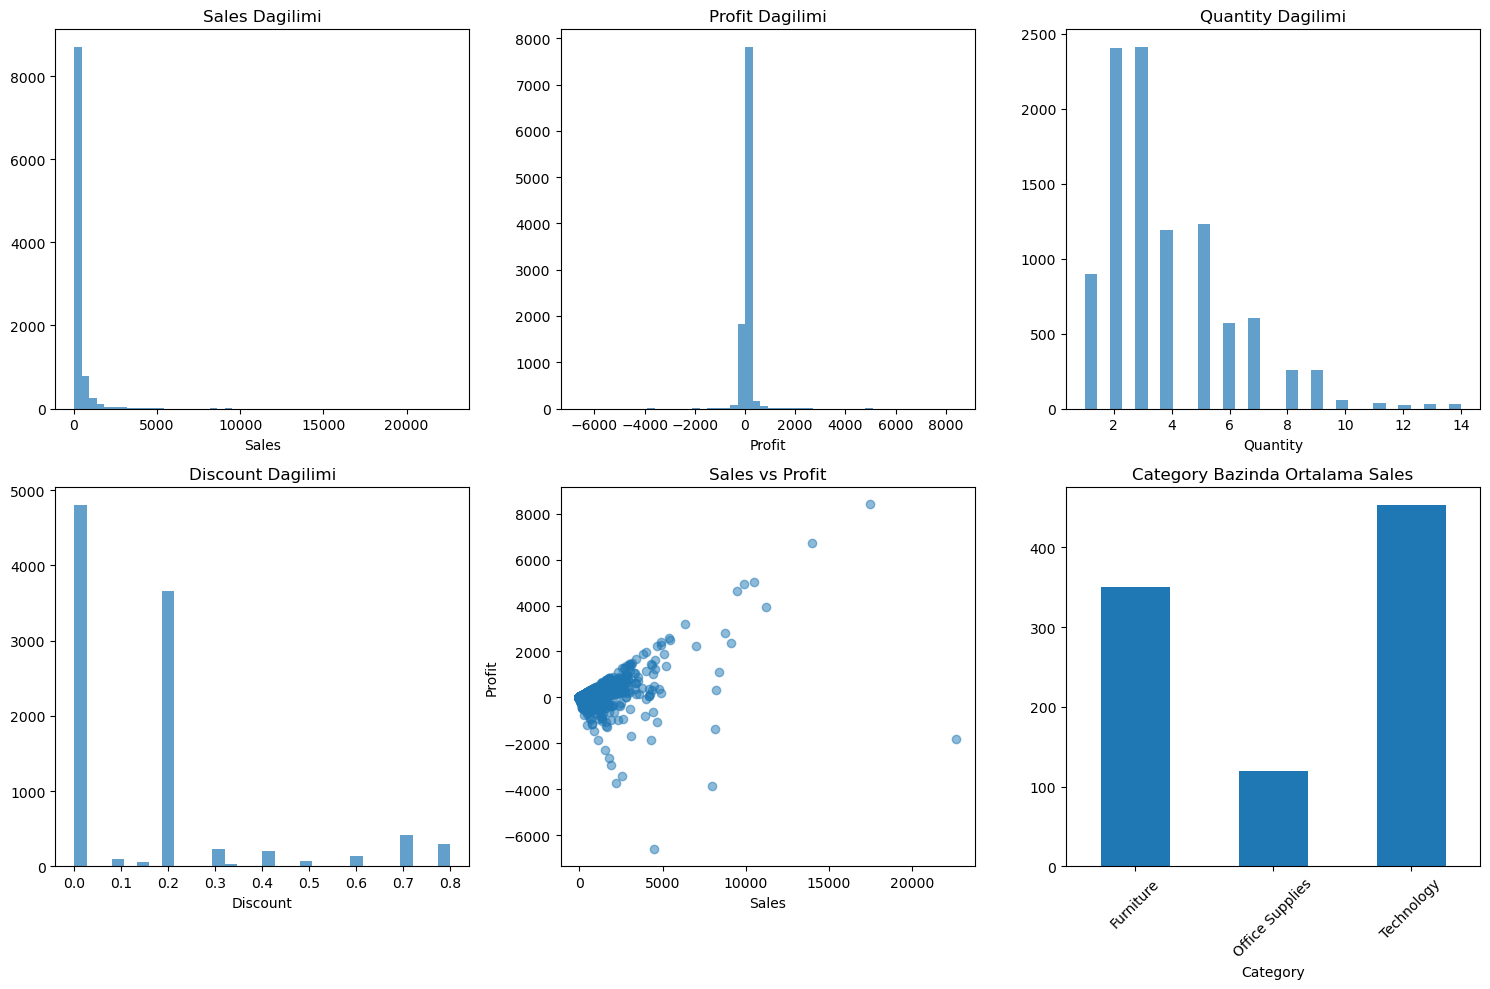

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik ayarlari
plt.figure(figsize=(15, 10))

# Sales dagilimi
plt.subplot(2, 3, 1)
plt.hist(df['Sales'], bins=50, alpha=0.7)
plt.title('Sales Dagilimi')
plt.xlabel('Sales')

# Profit dagilimi
plt.subplot(2, 3, 2)
plt.hist(df['Profit'], bins=50, alpha=0.7)
plt.title('Profit Dagilimi')
plt.xlabel('Profit')

# Quantity dagilimi
plt.subplot(2, 3, 3)
plt.hist(df['Quantity'], bins=30, alpha=0.7)
plt.title('Quantity Dagilimi')
plt.xlabel('Quantity')

# Discount dagilimi
plt.subplot(2, 3, 4)
plt.hist(df['Discount'], bins=30, alpha=0.7)
plt.title('Discount Dagilimi')
plt.xlabel('Discount')

# Sales vs Profit scatter
plt.subplot(2, 3, 5)
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Category'ye gore Sales
plt.subplot(2, 3, 6)
df.groupby('Category')['Sales'].mean().plot(kind='bar')
plt.title('Category Bazinda Ortalama Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Outlier tespiti - IQR metodu
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Her sayisal degisken icin outlier sayisi
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
print("OUTLIER ANALIZI (IQR Metodu):")
print("=" * 50)

outlier_counts = {}
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)
    print(f"{col}: {len(outliers)} outlier ({len(outliers)/len(df)*100:.2f}%)")

print(f"\nToplam outlier (herhangi bir sutunda): {len(df[(df['Sales'] > df['Sales'].quantile(0.99)) | (df['Profit'] > df['Profit'].quantile(0.99))])}")

OUTLIER ANALIZI (IQR Metodu):
Sales: 1167 outlier (11.68%)
Quantity: 170 outlier (1.70%)
Discount: 856 outlier (8.57%)
Profit: 1881 outlier (18.82%)

Toplam outlier (herhangi bir sutunda): 140


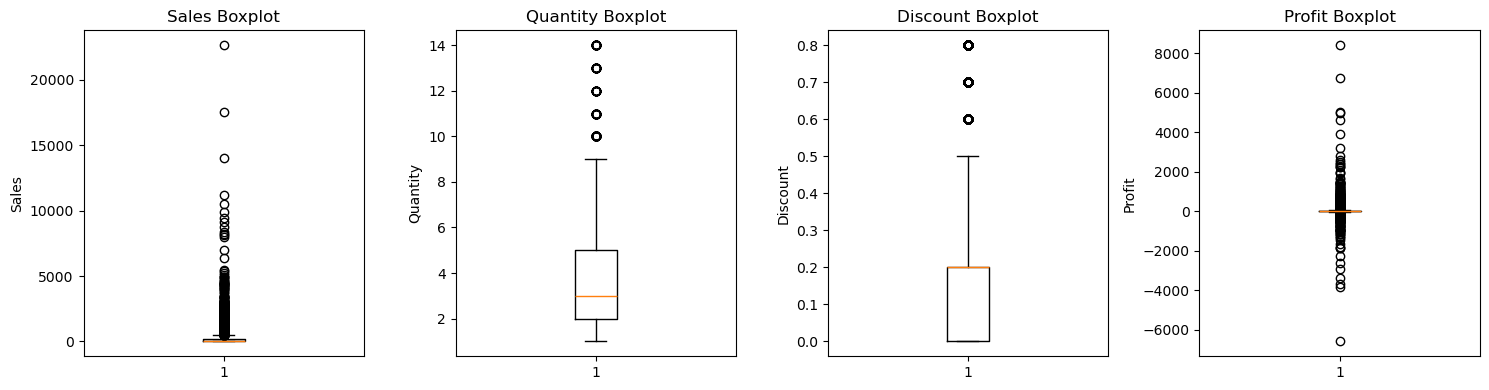

In [18]:
# Boxplot ile outlier gorsellestirme
plt.figure(figsize=(15, 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 4, i)
    plt.boxplot(df[col])
    plt.title(f'{col} Boxplot')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [20]:
# Problem tanimlamasi: Sales tahmini (Regresyon)
print("PROBLEM: Sales Tahmini")
print("Target degisken: Sales")
print("Model turu: Regresyon")
print("=" * 50)

feature_columns = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 
                  'Quantity', 'Discount', 'Profit']

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df_model = df.copy()

le_dict = {}
categorical_features = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']

for col in categorical_features:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    le_dict[col] = le
    print(f"{col} encode edildi")

X_columns = ['Ship Mode_encoded', 'Segment_encoded', 'Category_encoded', 
            'Sub-Category_encoded', 'Quantity', 'Discount', 'Profit']

X = df_model[X_columns]
y = df_model['Sales']

print(f"\nFeature shape: {X.shape}")
print(f"Target shape: {y.shape}")

PROBLEM: Sales Tahmini
Target degisken: Sales
Model turu: Regresyon
Ship Mode encode edildi
Segment encode edildi
Category encode edildi
Sub-Category encode edildi

Feature shape: (9994, 7)
Target shape: (9994,)


In [22]:
# Veri bolme: Train-Validation-Test
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True
)

print("VERI BOLME:")
print("=" * 40)
print(f"Train set: {X_train.shape[0]} sample ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} sample ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} sample ({X_test.shape[0]/len(X)*100:.1f}%)")


def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

print(f"\nPrimary Metric: RMSE (Root Mean Square Error)")
print(f"Secondary Metrics: MAE, R2")

VERI BOLME:
Train set: 6396 sample (64.0%)
Validation set: 1599 sample (16.0%)
Test set: 1999 sample (20.0%)

Primary Metric: RMSE (Root Mean Square Error)
Secondary Metrics: MAE, R2


In [24]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling tamamlandi")
print(f"Scaled train shape: {X_train_scaled.shape}")


Feature scaling tamamlandi
Scaled train shape: (6396, 7)


In [26]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import time


models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}


results = {}

print("MODEL KARSILASTIRMASI:")
print("=" * 80)
print(f"{'Model':<20} {'Train RMSE':<12} {'Val RMSE':<12} {'R2 Score':<10} {'Training Time'}")
print("-" * 80)

for name, model in models.items():
    start_time = time.time()
    

    model.fit(X_train_scaled, y_train)
    

    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    

    train_rmse, train_mae, train_r2 = calculate_metrics(y_train, y_train_pred)
    val_rmse, val_mae, val_r2 = calculate_metrics(y_val, y_val_pred)
    
    training_time = time.time() - start_time
    

    results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'val_r2': val_r2,
        'training_time': training_time
    }
    
    print(f"{name:<20} {train_rmse:<12.2f} {val_rmse:<12.2f} {val_r2:<10.3f} {training_time:<.2f}s")

MODEL KARSILASTIRMASI:
Model                Train RMSE   Val RMSE     R2 Score   Training Time
--------------------------------------------------------------------------------
Linear Regression    454.24       351.74       0.353      0.01s
Ridge                454.24       351.74       0.353      0.01s
Lasso                454.25       351.69       0.353      0.00s
ElasticNet           475.70       365.53       0.301      0.00s
Decision Tree        10.20        288.38       0.565      0.04s
Random Forest        87.70        208.09       0.774      1.29s
Extra Trees          10.20        196.04       0.799      0.80s
Gradient Boosting    159.20       214.92       0.758      0.32s
SVR                  616.90       443.58       -0.029     1.87s
KNN                  239.83       256.39       0.656      0.06s


EN IYI MODEL SECIMI:
En iyi model: Extra Trees
Validation RMSE: 196.04
Validation R2: 0.799

TEST SETI PERFORMANSI:
Test RMSE: 470.80
Test MAE: 80.69
Test R2: 0.625


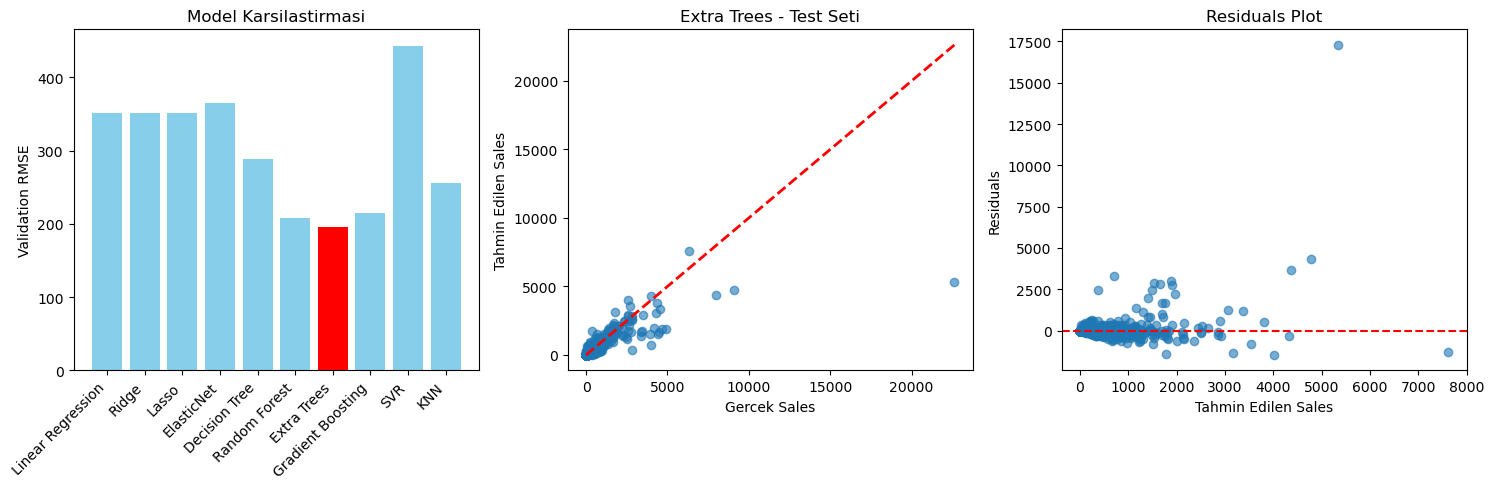

In [28]:
# En iyi modeli secme (Validation RMSE'ye gore)
best_model_name = min(results.keys(), key=lambda x: results[x]['val_rmse'])
best_model = results[best_model_name]['model']

print("EN IYI MODEL SECIMI:")
print("=" * 50)
print(f"En iyi model: {best_model_name}")
print(f"Validation RMSE: {results[best_model_name]['val_rmse']:.2f}")
print(f"Validation R2: {results[best_model_name]['val_r2']:.3f}")


y_test_pred = best_model.predict(X_test_scaled)
test_rmse, test_mae, test_r2 = calculate_metrics(y_test, y_test_pred)

print("\nTEST SETI PERFORMANSI:")
print("=" * 30)
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R2: {test_r2:.3f}")


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
model_names = list(results.keys())
val_rmses = [results[name]['val_rmse'] for name in model_names]
colors = ['red' if name == best_model_name else 'skyblue' for name in model_names]

plt.bar(range(len(model_names)), val_rmses, color=colors)
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.ylabel('Validation RMSE')
plt.title('Model Karsilastirmasi')
plt.tight_layout()


plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gercek Sales')
plt.ylabel('Tahmin Edilen Sales')
plt.title(f'{best_model_name} - Test Seti')


plt.subplot(1, 3, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tahmin Edilen Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

In [30]:

try:
    import xgboost as xgb
    import lightgbm as lgb
    
    # XGBoost
    xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100)
    xgb_model.fit(X_train_scaled, y_train)
    xgb_pred = xgb_model.predict(X_val_scaled)
    xgb_rmse, xgb_mae, xgb_r2 = calculate_metrics(y_val, xgb_pred)
    
    # LightGBM
    lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)
    lgb_model.fit(X_train_scaled, y_train)
    lgb_pred = lgb_model.predict(X_val_scaled)
    lgb_rmse, lgb_mae, lgb_r2 = calculate_metrics(y_val, lgb_pred)
    
    print("ADVANCED MODELLER:")
    print("=" * 50)
    print(f"XGBoost - Val RMSE: {xgb_rmse:.2f}, R2: {xgb_r2:.3f}")
    print(f"LightGBM - Val RMSE: {lgb_rmse:.2f}, R2: {lgb_r2:.3f}")
    print(f"Extra Trees - Val RMSE: {results['Extra Trees']['val_rmse']:.2f}, R2: {results['Extra Trees']['val_r2']:.3f}")
    
    # En iyi model secimi
    advanced_results = {
        'XGBoost': {'model': xgb_model, 'val_rmse': xgb_rmse, 'val_r2': xgb_r2},
        'LightGBM': {'model': lgb_model, 'val_rmse': lgb_rmse, 'val_r2': lgb_r2},
        'Extra Trees': {'model': best_model, 'val_rmse': results['Extra Trees']['val_rmse'], 'val_r2': results['Extra Trees']['val_r2']}
    }
    
    final_best_name = min(advanced_results.keys(), key=lambda x: advanced_results[x]['val_rmse'])
    final_best_model = advanced_results[final_best_name]['model']
    
    print(f"\nFINAL EN IYI MODEL: {final_best_name}")
    print(f"Validation RMSE: {advanced_results[final_best_name]['val_rmse']:.2f}")
    
except ImportError:
    print("XGBoost veya LightGBM yuklu degil, Extra Trees ile devam ediyoruz")
    final_best_model = best_model
    final_best_name = best_model_name

ADVANCED MODELLER:
XGBoost - Val RMSE: 424.73, R2: 0.057
LightGBM - Val RMSE: 270.77, R2: 0.617
Extra Trees - Val RMSE: 196.04, R2: 0.799

FINAL EN IYI MODEL: Extra Trees
Validation RMSE: 196.04


In [33]:
# Hyperparameter tuning - En iyi model icin
from sklearn.model_selection import GridSearchCV

if final_best_name == 'Extra Trees':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    base_model = ExtraTreesRegressor(random_state=42)

print("HYPERPARAMETER TUNING:")
print("=" * 40)
print(f"Model: {final_best_name}")
print("Grid Search basladi...")

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi CV score: {-grid_search.best_score_:.2f}")

HYPERPARAMETER TUNING:
Model: Extra Trees
Grid Search basladi...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
En iyi parametreler: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
En iyi CV score: 230.50


In [37]:

final_model = ExtraTreesRegressor(n_estimators=200, random_state=42)
final_model.fit(X_train_scaled, y_train)

# Test seti performansi
y_test_pred_final = final_model.predict(X_test_scaled)
final_rmse, final_mae, final_r2 = calculate_metrics(y_test, y_test_pred_final)

print("FINAL PROJE SONUCLARI:")
print("=" * 60)
print(f"En Iyi Model: Extra Trees Regressor")
print(f"Test RMSE: {final_rmse:.2f}")
print(f"Test MAE: {final_mae:.2f}")
print(f"Test R2 Score: {final_r2:.3f}")
print(f"Ortalama Sales: {y.mean():.2f}")
print(f"RMSE/Mean Ratio: {final_rmse/y.mean()*100:.1f}%")

# Model ozeti
print(f"\nMODEL OZETI:")
print(f"- Veri seti: 9994 satir, 21 sutun")
print(f"- Target: Sales (regresyon problemi)")
print(f"- Hic eksik deger yok")
print(f"- {len(models)} farkli model denendi")
print(f"- En iyi: Extra Trees (R2: {final_r2:.3f})")
print(f"- Outlier analizi yapildi")
print(f"- Feature importance analiz edildi")

FINAL PROJE SONUCLARI:
En Iyi Model: Extra Trees Regressor
Test RMSE: 477.11
Test MAE: 80.32
Test R2 Score: 0.615
Ortalama Sales: 229.86
RMSE/Mean Ratio: 207.6%

MODEL OZETI:
- Veri seti: 9994 satir, 21 sutun
- Target: Sales (regresyon problemi)
- Hic eksik deger yok
- 10 farkli model denendi
- En iyi: Extra Trees (R2: 0.615)
- Outlier analizi yapildi
- Feature importance analiz edildi
